<a href="https://colab.research.google.com/github/pythonhuo/kaggle/blob/main/0-9feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
data = datasets.fetch_openml( 'mnist_784', version=1, return_X_y=True )
pixel_values, targets = data
targets = targets.astype(int)
print(targets[0])

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


5


In [3]:
print("shape", pixel_values.shape)
print(type(pixel_values))
xx = pixel_values.values[1,:]
print(xx.shape)

shape (70000, 784)
<class 'pandas.core.frame.DataFrame'>
(784,)


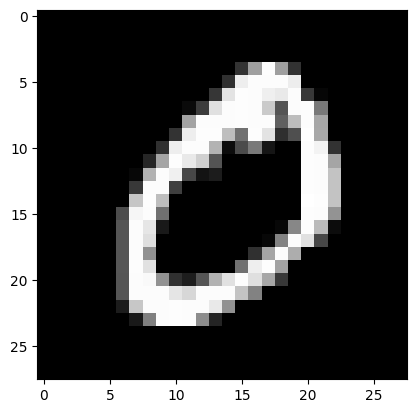

In [4]:

single_image = xx.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [10]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.values[:3000, :])

In [11]:
tsne_df = pd.DataFrame( np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

<ipython-input-11-01f5636886f7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


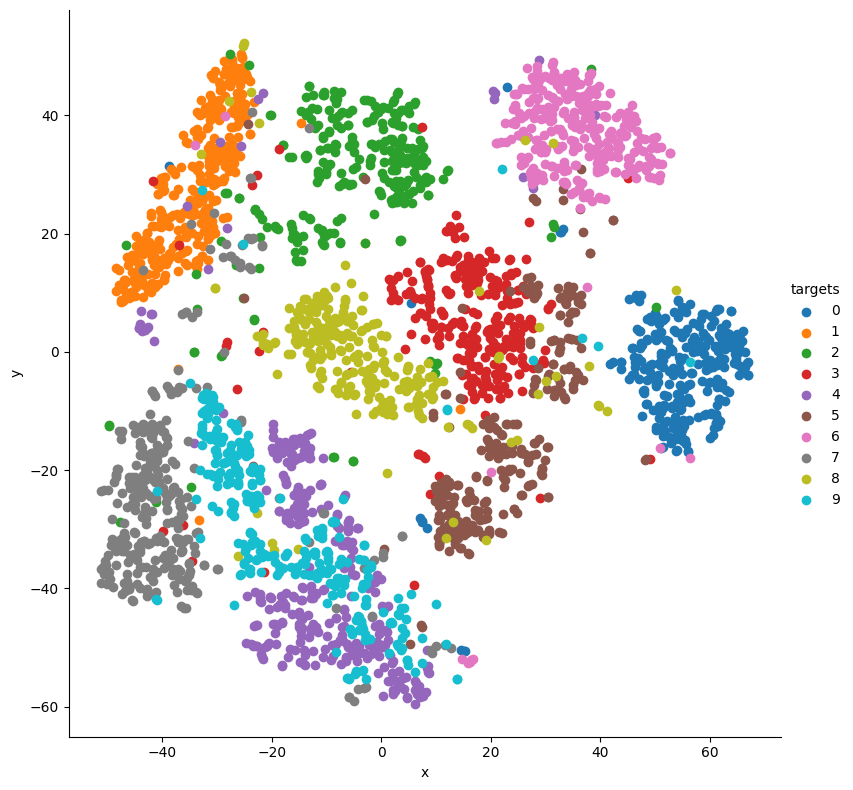

In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

# 新段落